In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
%%capture
!pip install pydub
!pip install noisereduce

In [23]:
%%capture
import os
import numpy as np

from pydub import AudioSegment, effects
import librosa
import noisereduce as nr

import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

In [24]:
# Define file path for a single file.
path = '/content/drive/My Drive/datasets/RAVDESS/Actor_02/03-01-01-01-01-01-02.wav'

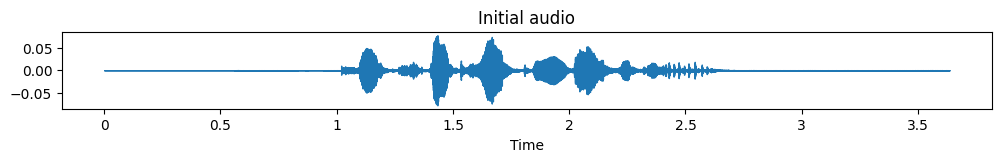

In [25]:
# 1. Load the audio file into an 'AudioSegment' object, and extract the sample rate.
#    'x' is an array of samples that is only relevant for visualization at this part.

rawsound = AudioSegment.from_file(path)
x, sr = librosa.load(path, sr = None)

plt.figure(figsize=(12,1))
librosa.display.waveshow(x, sr=sr)
plt.title('Initial audio')

rawsound

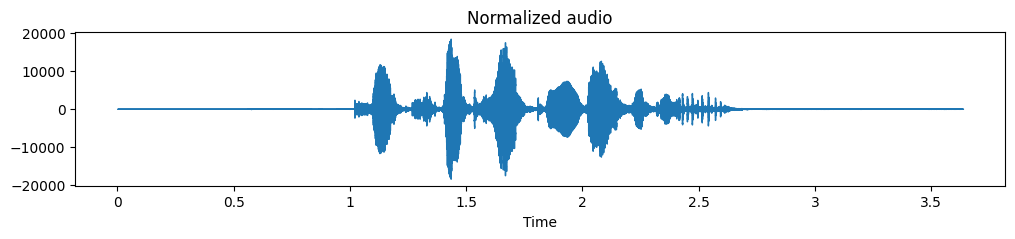

In [26]:
# 2. Normalize to +5.0 dBFS, Transform audio signals to an array.

normalizedsound = effects.normalize(rawsound, headroom = 5.0)
normal_x = np.array(normalizedsound.get_array_of_samples(), dtype = 'float32')

plt.figure(figsize=(12,2))
librosa.display.waveshow(normal_x, sr=sr)
plt.title('Normalized audio')

normalizedsound

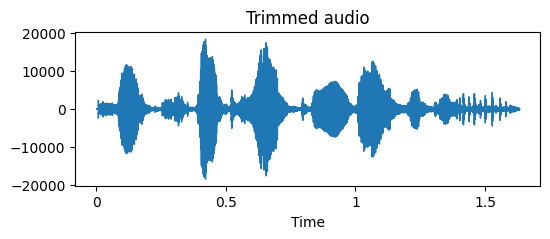

In [27]:
# 3. Trim silence in the beginning and end.

xt, index = librosa.effects.trim(normal_x, top_db = 30)

plt.figure(figsize=(6,2))
librosa.display.waveshow(xt, sr=sr)
plt.title('Trimmed audio')

ipd.display(ipd.Audio(data = xt, rate=sr))

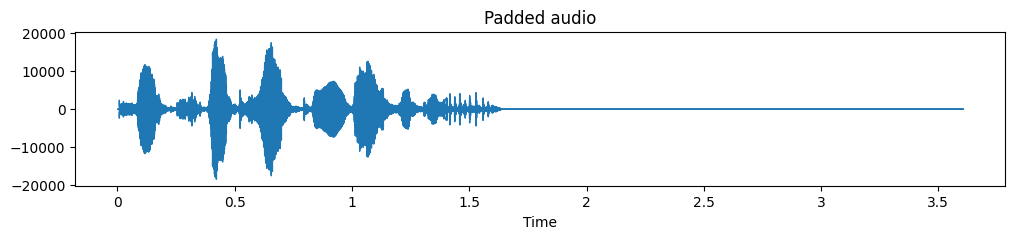

In [28]:
# 4. Right-side padding for length equalization.
#    173056 = maximum lengthed audio (the extraction of this value is performed in the "SpeechEmotionRecognion_Model" notebook.)

padded_x = np.pad(xt, (0, 173056-len(xt)), 'constant')

plt.figure(figsize=(12,2))
librosa.display.waveshow(padded_x, sr=sr)
plt.title('Padded audio')

ipd.display(ipd.Audio(data = padded_x, rate=sr))

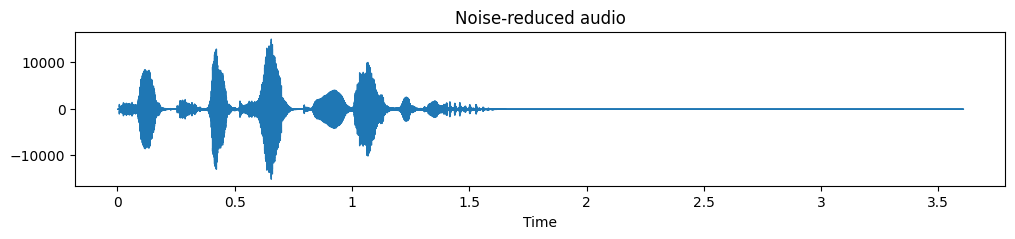

In [32]:
# 5. Noise reduction
#    Note: although there is no noise to reduce from RAVDESS nor TESS databases, reduce_noise function by noisereduce library attributes a uniform stamper to the audio files.

final_x = nr.reduce_noise(y=padded_x,
                          y_noise=padded_x,
                         sr=sr)

plt.figure(figsize=(12,2))
librosa.display.waveshow(final_x, sr=sr)
plt.title('Noise-reduced audio')

ipd.display(ipd.Audio(data = final_x, rate=sr))

In [36]:
# Feature extraction

frame_length = 2048
hop_length = 512

spec = np.abs(librosa.stft(final_x, n_fft=frame_length, hop_length=hop_length))
f1 = librosa.feature.rms(S=spec)
print('Energy shape:', f1.shape)
f2 = librosa.feature.zero_crossing_rate(final_x, frame_length=frame_length, hop_length=hop_length) # Zero Crossed Rate (ZCR)
print('ZCR shape:', f2.shape)
f3 = librosa.feature.mfcc(S=librosa.power_to_db(spec), sr=sr, n_mfcc=13)
print('MFCCs shape:', f3.shape)


Energy shape: (1, 339)
ZCR shape: (1, 339)
MFCCs shape: (13, 339)
